Importing the necessary libraries

In [123]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline
from numpy.polynomial import Polynomial
from scipy.optimize import curve_fit
import sympy as sp

Reading the excel sheet 

In [124]:
data=pd.read_excel("200G_lndem_3D data.xlsx")
df=pd.DataFrame(data)
print(df)

    Spicules  Height[i]  Height (Mm)
0        148        180     6.997646
1        152        183     7.200592
2        142        186     7.403538
3        134        189     7.606484
4        137        192     7.809430
..       ...        ...          ...
70         1        390    21.203867
71         2        393    21.406813
72         1        396    21.609759
73         1        399    21.812705
74         0        402    22.015651

[75 rows x 3 columns]


Exporting the excel sheet data into different lists

In [125]:
H_ind=df.loc[:,"Height[i]"]
H_Mm=df.loc[:,"Height (Mm)"]
nspic=df.loc[:,"Spicules"]

Plotting the curve followed by the data and the bar graph

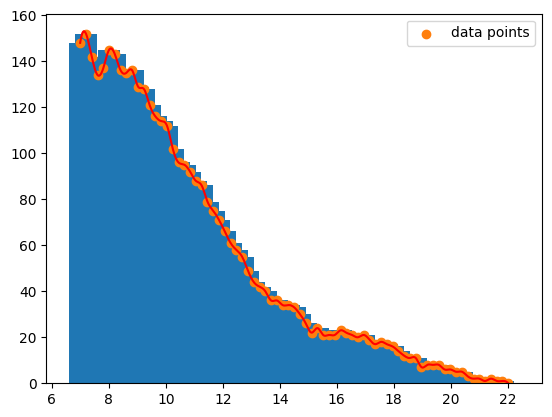

In [126]:
plt.bar(H_Mm,nspic)
plt.scatter(H_Mm,nspic,label='data points')
#plt.xlim(150,675)

p=np.array(H_Mm)
q=np.array(nspic)
X_Y_Spline= make_interp_spline(p,q)
X_ =np.linspace(p.min(),p.max(),500)
Y_ =X_Y_Spline(X_)

plt.plot(X_,Y_,color='red')
plt.legend()

plt.show()

Now, finding the exact form of the polynomial equation followed by the exported data and plotting it together with the data and Printing the exact form of the curve

Equation: - 5.36 x^{3} + 36.38 x^{2} - 83.71 x + 69.87


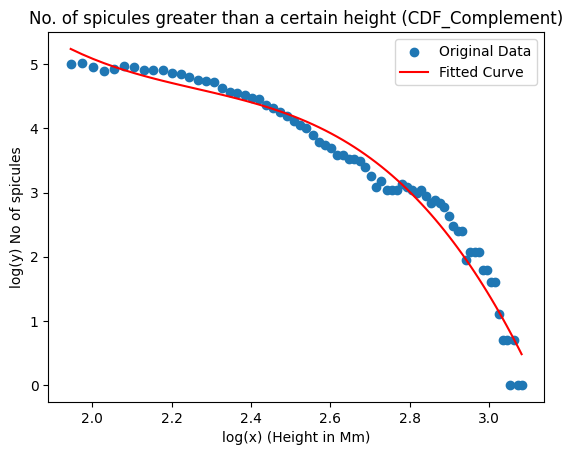

In [127]:
def fractional_polynomial(log_x, *coefficients):
    equation = sum(coeff * (log_x ** power) for power, coeff in enumerate(coefficients))
    return equation

# Generate some sample data
x_data = H_Mm[:-1] 
y_data = nspic[:-1] 

# Apply logarithmic transformation
log_x_data = np.log(x_data)
log_y_data = np.log(y_data)

# Specify the number of parameters
num_params = 4  # Adjust based on the expected number of coefficients

# Fit the data to the logarithmic form of the fractional polynomial function
coefficients, _ = curve_fit(fractional_polynomial, log_x_data, log_y_data, maxfev=10000, p0=[1] * num_params)

# Create a symbolic variable for log(x)
x = sp.symbols('x')

# Generate the equation using sympy
equation = sum(coeff * (x ** power) for power, coeff in enumerate(np.round(coefficients,2)))
equation = sp.expand(equation)  # Expand the equation for better readability

# Print the equation in a clear form
equation_str = sp.latex(equation)
print("Equation:", equation_str)

# Plot the original data points and the fitted curve in logarithmic form
plt.scatter(log_x_data, log_y_data, label='Original Data')
plt.plot(log_x_data, fractional_polynomial(log_x_data, *coefficients), 'r-', label='Fitted Curve')
plt.xlabel('log(x) (Height in Mm)')
plt.ylabel('log(y) No of spicules')
plt.legend()
plt.title('No. of spicules greater than a certain height (CDF_Complement)')
plt.show()


Now changing the distribution by imposing the condition that number of spicules less than a certain height rather than more than a certain height, in order ot find the real CDF 

In [128]:
L_nspic=[]

for i in range(len(H_ind)):
    nspic_l=nspic[0]-nspic[i]
    L_nspic.append(nspic_l)
    
print(L_nspic)

[0, -4, 6, 14, 11, 3, 5, 12, 13, 12, 19, 20, 27, 32, 34, 36, 46, 52, 53, 56, 60, 62, 69, 73, 77, 82, 87, 90, 93, 99, 104, 106, 108, 112, 112, 114, 114, 115, 118, 122, 126, 124, 127, 127, 127, 125, 126, 127, 128, 127, 129, 131, 130, 131, 132, 134, 136, 137, 137, 141, 140, 140, 140, 142, 142, 143, 143, 145, 146, 146, 147, 146, 147, 147, 148]


In [129]:
H_norm=[]
H_min=np.min(H_Mm)
H_max=np.max(H_Mm)
for i in range(0,len(H_ind)):
    normal_height=(H_Mm[i]-H_min)/(H_max-H_min)
    H_norm.append(normal_height)

print(H_norm)

[0.0, 0.0135135135135135, 0.027027027027027, 0.040540540540540446, 0.054054054054054, 0.0675675675675675, 0.081081081081081, 0.0945945945945945, 0.108108108108108, 0.12162162162162163, 0.13513513513513511, 0.14864864864864863, 0.16216216216216212, 0.17567567567567563, 0.18918918918918912, 0.20270270270270274, 0.21621621621621626, 0.22972972972972974, 0.24324324324324326, 0.25675675675675674, 0.27027027027027023, 0.28378378378378377, 0.29729729729729737, 0.31081081081081086, 0.3243243243243244, 0.3378378378378379, 0.35135135135135137, 0.36486486486486486, 0.3783783783783784, 0.3918918918918919, 0.4054054054054055, 0.41891891891891897, 0.4324324324324325, 0.445945945945946, 0.4594594594594595, 0.47297297297297297, 0.4864864864864865, 0.5, 0.5135135135135135, 0.5270270270270271, 0.5405405405405406, 0.5540540540540542, 0.5675675675675677, 0.5810810810810811, 0.5945945945945946, 0.6081081081081081, 0.6216216216216217, 0.6351351351351351, 0.6486486486486488, 0.6621621621621622, 0.67567567567

Now, Fitting a polynomial curve equation to the CDF, since we have considered fractional powers, logarithmic conversions have been made to compensate for them

[0.04054054 0.09459459 0.07432432 0.02027027 0.03378378 0.08108108
 0.08783784 0.08108108 0.12837838 0.13513514 0.18243243 0.21621622
 0.22972973 0.24324324 0.31081081 0.35135135 0.35810811 0.37837838
 0.40540541 0.41891892 0.46621622 0.49324324 0.52027027 0.55405405
 0.58783784 0.60810811 0.62837838 0.66891892 0.7027027  0.71621622
 0.72972973 0.75675676 0.75675676 0.77027027 0.77027027 0.77702703
 0.7972973  0.82432432 0.85135135 0.83783784 0.85810811 0.85810811
 0.85810811 0.84459459 0.85135135 0.85810811 0.86486486 0.85810811
 0.87162162 0.88513514 0.87837838 0.88513514 0.89189189 0.90540541
 0.91891892 0.92567568 0.92567568 0.9527027  0.94594595 0.94594595
 0.94594595 0.95945946 0.95945946 0.96621622 0.96621622 0.97972973
 0.98648649 0.98648649 0.99324324 0.98648649 0.99324324 0.99324324
 1.        ]
Equation: - 0.27 x^{3} - 1.39 x^{2} - 0.71 x - 0.12


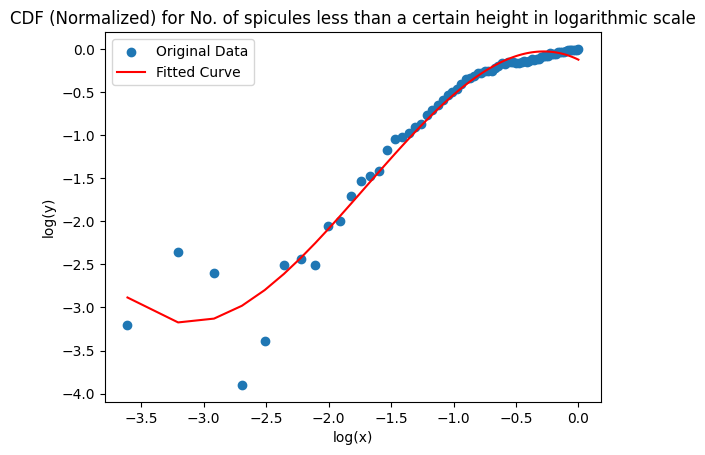

In [130]:
def fractional_polynomial(log_x, *coefficients):
    equation = sum(coeff * (log_x ** power) for power, coeff in enumerate(coefficients))
    return equation

# Generate some sample data
x_data = H_norm[2:]
y_data = L_nspic[2:]/L_nspic[len(H_ind)-1]

print(y_data)

# Apply logarithmic transformation
log_x_data = np.log(x_data)
log_y_data = np.log(y_data)

# Specify the number of parameters
num_params = 4  # Adjust based on the expected number of coefficients

# Fit the data to the logarithmic form of the fractional polynomial function
coefficients, _ = curve_fit(fractional_polynomial, log_x_data, log_y_data, maxfev=10000, p0=[1] * num_params)

# Create a symbolic variable for log(x)
x = sp.symbols('x')

# Generate the equation using sympy
equation = sum(coeff * (x ** power) for power, coeff in enumerate(np.round(coefficients,2)))
equation = sp.expand(equation)  # Expand the equation for better readability

# Print the equation in a clear form
equation_str = sp.latex(equation)
print("Equation:", equation_str)

# Plot the original data points and the fitted curve in logarithmic form
plt.scatter(log_x_data, log_y_data, label='Original Data')
plt.plot(log_x_data, fractional_polynomial(log_x_data, *coefficients), 'r-', label='Fitted Curve')
plt.xlabel('log(x)')
plt.ylabel('log(y)')
plt.legend()
plt.title('CDF (Normalized) for No. of spicules less than a certain height in logarithmic scale')
plt.show()


Now, Fitting a power law to the log of the CDF

Case I: Considering only a single power law for the entire domain

Fitted Parameters:
a = 1.1523457831756765
b = 0.7170615370603775


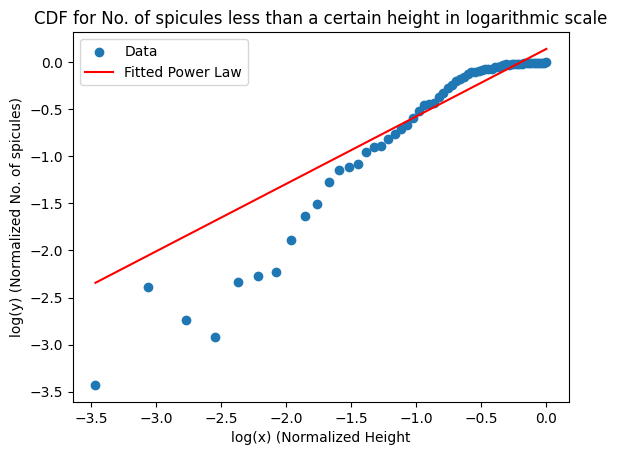

In [109]:
import numpy as np
from scipy.optimize import curve_fit

# Define the power law equation
def power_law(x, a, b):
    return a * np.power(x, b)

# Generate example data
x_data = (H_norm[2:]) # Change slicing to whatever index until it excludes negative numbers
y_data = (L_nspic[2:]/L_nspic[len(H_ind)-1]) #

# Perform the power law fitting
params, _ = curve_fit(power_law, x_data, y_data)

# Extract the fitted parameters
a_fit, b_fit = params

# Print the fitted parameters
print("Fitted Parameters:")
print("a =", a_fit)
print("b =", b_fit)

# Generate points for the fitted power law curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = power_law(x_fit, a_fit, b_fit)

# Plot the data and the fitted curve
plt.scatter(np.log(x_data), np.log(y_data), label='Data')
plt.plot(np.log(x_fit), np.log(y_fit), color='red', label='Fitted Power Law')

#plt.scatter((x_data), (y_data), label='Data')
#plt.plot((x_fit),(y_fit), color='red', label='Fitted Power Law')

plt.xlabel('log(x) (Normalized Height')
plt.ylabel('log(y) (Normalized No. of spicules)')
plt.legend()
plt.title('CDF for No. of spicules less than a certain height in logarithmic scale')
plt.show()

Case II: breaking the domain into two parts to account for the different power laws

Fitted Parameters:
a1 = 2.7511413141410914
b1 = 1.4803350301315135
Fitted Parameters:
a2 = 1.013463877501432
b2 = 0.3684227136651173


C:\Users\HP\AppData\Local\Temp\ipykernel_9304\4292535992.py:46: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(x_data), np.log(y_data), label='Data')


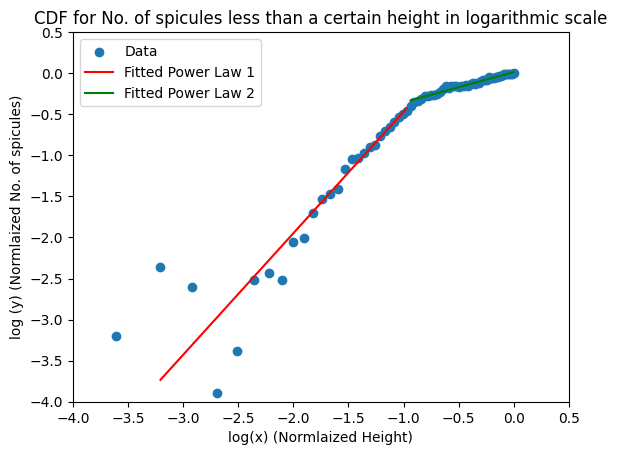

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the power law equation
def power_law(x, a, b):
    return a * np.power(x, b)

# Generate example data
x_data = (H_norm[1:]) # np.array([1, 2, 3, 4, 5])  # Independent variable
y_data = (L_nspic[1:]/L_nspic[len(H_ind)-1])#np.array([2, 4, 8, 16, 32])  # Dependent variable

# Extract the subsets of data
x_subset_1 = x_data[2:28]
y_subset_1 = y_data[2:28]

x_subset_2 = x_data[28:len(H_ind)-1]
y_subset_2 = y_data[28:len(H_ind)-1]

# Perform power law fitting for each subset
params_1, _ = curve_fit(power_law, x_subset_1, y_subset_1)
params_2, _ = curve_fit(power_law, x_subset_2, y_subset_2)

# Extract the fitted parameters
a_fit_1, b_fit_1 = params_1
a_fit_2, b_fit_2 = params_2

# Generate points for the fitted power law curves
x_fit_1 = np.linspace(min(x_subset_1), max(x_subset_1), 100)
y_fit_1 = power_law(x_fit_1, a_fit_1, b_fit_1)

x_fit_2 = np.linspace(min(x_subset_2), max(x_subset_2), 100)
y_fit_2 = power_law(x_fit_2, a_fit_2, b_fit_2)

# Print the fitted parameters for 1st power law
print("Fitted Parameters:")
print("a1 =", a_fit_1)
print("b1 =", b_fit_1)

# Print the fitted parameters for 2nd power law
print("Fitted Parameters:")
print("a2 =", a_fit_2)
print("b2 =", b_fit_2)

# Plot the data and the fitted curves
plt.scatter(np.log(x_data), np.log(y_data), label='Data')
plt.plot(np.log(x_fit_1), np.log(y_fit_1), color='red', label='Fitted Power Law 1')
plt.plot(np.log(x_fit_2), np.log(y_fit_2), color='green', label='Fitted Power Law 2')

#plt.scatter((x_data), (y_data), label='Data')
#plt.plot((x_fit_1), (y_fit_1), color='red', label='Fitted Power Law 1')
#plt.plot((x_fit_2), (y_fit_2), color='blue', label='Fitted Power Law 2')

plt.xlabel('log(x) (Normlaized Height)')
plt.ylabel('log (y) (Normlaized No. of spicules)')
plt.legend()
plt.title('CDF for No. of spicules less than a certain height in logarithmic scale')
plt.xlim(-4, 0.5)
plt.ylim(-4, 0.5)
plt.show()

Now, taking the numerical derivative to find the PDF 

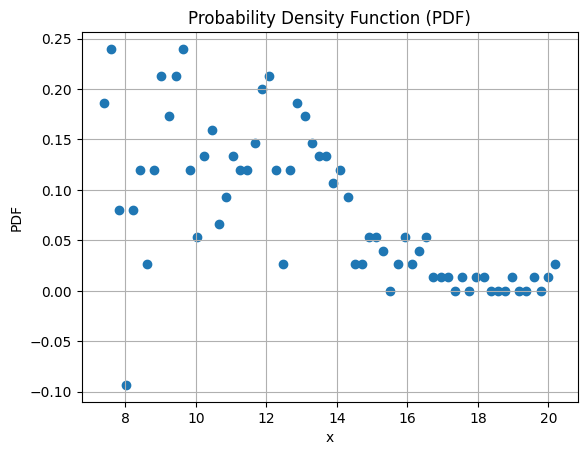

In [137]:
# Generate the CDF arrays
x = H_Mm[1:]
cdf = (L_nspic[1:]/L_nspic[len(H_ind)-1])


# Calculate the PDF by dividing the differences in CDF by the differences in x
pdf = np.gradient(cdf,x)
# Plot the PDF
plt.scatter(x, pdf)
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Probability Density Function (PDF)')
plt.grid(True)
plt.show()


Now, fitting a power law to this PDF

Case I: Considering a single power law for the entire domain

Fitted Parameters:
a = 2.9731613324058115
b = -1.42505133548077


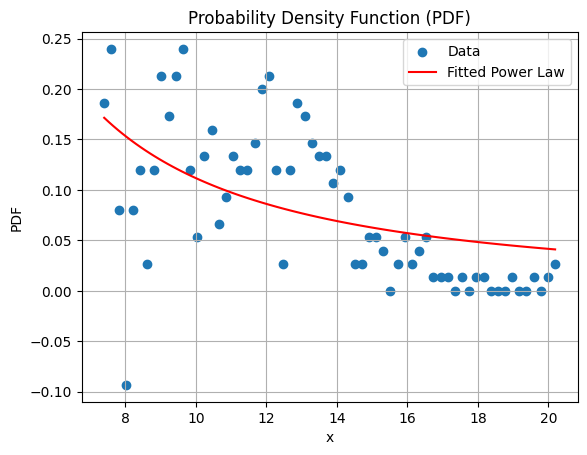

In [138]:
import numpy as np
from scipy.optimize import curve_fit

# Define the power law equation
def power_law(x, a, b):
    return a * np.power(x, b)

# Generate example data
x_data = H_Mm[1:] # np.array([1, 2, 3, 4, 5])  # Independent variable
y_data = pdf #np.array([2, 4, 8, 16, 32])  # Dependent variable

# Perform the power law fitting
params, _ = curve_fit(power_law, x_data, y_data)

# Extract the fitted parameters
a_fit, b_fit = params

# Print the fitted parameters
print("Fitted Parameters:")
print("a =", a_fit)
print("b =", b_fit)

# Generate points for the fitted power law curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = power_law(x_fit, a_fit, b_fit)

# Plot the data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_fit, y_fit, color='red', label='Fitted Power Law')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Probability Density Function (PDF)')
plt.grid(True)
plt.legend()
plt.show()


Case II: Considering two different power laws in succession

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the power law equation
def power_law(x, a, b):
    return a * np.power(x, b)

# Generate example data
x_data = H_Mm #np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # X-axis data
y_data = pdf #np.array([2, 4, 8, 16, 32, 1, 0.5, 0.25, 0.125, 0.0625])  # Y-axis data

# Define the range of indices for the subsets
index_subset_1 = np.arange(5)  # Subset 1 indices
index_subset_2 = np.arange(5, 31)  # Subset 2 indices

# Extract the subsets of data
x_subset_1 = x_data[index_subset_1]
y_subset_1 = y_data[index_subset_1]

x_subset_2 = x_data[index_subset_2]
y_subset_2 = y_data[index_subset_2]

# Perform power law fitting for each subset
params_1, _ = curve_fit(power_law, x_subset_1, y_subset_1)
params_2, _ = curve_fit(power_law, x_subset_2, y_subset_2)

# Extract the fitted parameters
a_fit_1, b_fit_1 = params_1
a_fit_2, b_fit_2 = params_2

# Print the fitted parameters for 1st power law
print("Fitted Parameters for 1st power law:")
print("a1 =", a_fit_1)
print("b1 =", b_fit_1)

# Print the fitted parameters for 2nd power law
print("Fitted Parameters for 2nd power law:")
print("a2 =", a_fit_2)
print("b2 =", b_fit_2)

# Generate points for the fitted power law curves
x_fit_1 = np.linspace(min(x_subset_1), max(x_subset_1), 100)
y_fit_1 = power_law(x_fit_1, a_fit_1, b_fit_1)

x_fit_2 = np.linspace(min(x_subset_2), max(x_subset_2), 100)
y_fit_2 = power_law(x_fit_2, a_fit_2, b_fit_2)

# Plot the data and the fitted curves
plt.scatter(x_data[1:], y_data, label='Data')
plt.plot(x_fit_1, y_fit_1, color='red', label='Fitted Power Law 1')
plt.plot(x_fit_2, y_fit_2, color='blue', label='Fitted Power Law 2')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Probability Density Function (PDF)')
plt.grid(True)
plt.legend()
plt.show()


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.